# Введение в Data Science и машинное обучение
# _Задачи_

## 1. Введение

### 1.4. Pandas, Dataframes, нет, панды тут ни при чем

А теперь используем эти методы на знаменитом [титаническом датасэте](https://stepik.org/media/attachments/course/4852/titanic.csv)! 

Загрузите датасэт, посмотрите на датафрэйм и ответьте на вопросы

Число колонок в представленном датафрэйме `_`, а число строк `_`. Тип float имеют `_` колонки, int - `_`, и object `_`

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('data\\titanic.csv')

In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

Число колонок в представленном датафрэйме `12`, а число строк `891`. Тип float имеют `2` колонки, int - `5`, и object `5`

### 1.5. Фильтрация данных

`?`

У какой доли студентов из [датасэта](https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv) в колонке `lunch` указано `free/reduced`?

In [6]:
students_performance = pd.read_csv('data\\StudentsPerformance.csv')

In [7]:
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
students_performance.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
len(students_performance[students_performance['lunch'] == 'free/reduced']) \
    / len(students_performance)

0.355

`?`

Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?

In [10]:
students_performance[students_performance['lunch'] == 'free/reduced'].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [11]:
students_performance[students_performance['lunch'] != 'free/reduced'].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [12]:
students_performance[students_performance['lunch'] == 'free/reduced'].var()

math score       229.824270
reading score    221.871139
writing score    238.202881
dtype: float64

In [13]:
students_performance[students_performance['lunch'] != 'free/reduced'].var()

math score       186.418089
reading score    191.285560
writing score    205.620887
dtype: float64

- `студенты со стандартным ланчем имеют в среднем более хорошие оценки`

- `дисперсия оценок студентов со стандартным ланчем меньше`

### 1.6. Группировка и агрегация, ничего, скоро привыкнем

`?`

Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из [датасэта](https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv) по числу их ног (колонка `legs`), и заполните их число в задании ниже.

Данные взяты [отсюда](https://api.opendota.com/api/heroes), на [этом же сайте](https://www.opendota.com/) можно найти больше разнообразных данных по Dota2.

- Число героев с "0 ног" - `__`
- Число героев с 2-мя ногами -  `__`
- Число героев с 4-мя ногами -  `__`
- Число героев с 6-ю ногами -  `__`
- Число героев с 8-ю ногами -  `__`

In [14]:
dota = pd.read_csv('data\\dota_hero_stats.csv')

In [15]:
dota.head(2)

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"


In [16]:
dota.columns

Index(['Unnamed: 0', 'attack_type', 'id', 'legs', 'localized_name', 'name',
       'primary_attr', 'roles'],
      dtype='object')

In [17]:
dota['legs'].value_counts()

2    95
0    11
4     7
6     3
8     1
Name: legs, dtype: int64

In [18]:
dota.groupby('legs').size()

legs
0    11
2    95
4     7
6     3
8     1
dtype: int64

- Число героев с "0 ног" - `11`
- Число героев с 2-мя ногами -  `95`
- Число героев с 4-мя ногами -  `7`
- Число героев с 6-ю ногами -  `3`
- Число героев с 8-ю ногами -  `1`

`?`

К нам поступили [данные](https://stepik.org/media/attachments/course/4852/accountancy.csv) из бухгалтерии о заработках Лупы и Пупы за разные задачи! 

Посмотрите у кого из них больше средний заработок в различных категориях (колонка `Type`) и заполните таблицу, указывая исполнителя с большим заработком в каждой из категорий.

In [19]:
pupaloopa = pd.read_csv('data\\accountancy.csv')
pupaloopa.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [20]:
pupaloopa_mean_salary = pupaloopa.groupby(['Type', 'Executor'])[['Salary']].mean()
pupaloopa_mean_salary

Salary
Type Executor            
A    Loopa      58.000000
     Pupa      160.833333
B    Loopa     145.166667
     Pupa       77.000000
C    Loopa     154.333333
     Pupa       74.500000
D    Loopa     137.714286
     Pupa      146.500000
E    Loopa     164.000000
     Pupa      131.200000
F    Loopa     238.000000
     Pupa      136.250000

In [21]:
pupaloopa_mean_salary.unstack()

Salary            
Executor       Loopa        Pupa
Type                            
A          58.000000  160.833333
B         145.166667   77.000000
C         154.333333   74.500000
D         137.714286  146.500000
E         164.000000  131.200000
F         238.000000  136.250000

`?`

Продолжим исследование героев `Dota2`. 

Сгруппируйте по колонкам `attack_type` и `primary_attr` и выберите самый распространённый набор характеристик.

In [22]:
dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [23]:
dota.groupby(['attack_type', 'primary_attr']).count()

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Melee       agi                   19  19    19              19    19     19
            int                    2   2     2               2     2      2
            str                   35  35    35              35    35     35
Ranged      agi                   18  18    18              18    18     18
            int                   40  40    40              40    40     40
            str                    3   3     3               3     3      3

In [24]:
dota.groupby(['attack_type', 'primary_attr'])[['id']].count()

id
attack_type primary_attr    
Melee       agi           19
            int            2
            str           35
Ranged      agi           18
            int           40
            str            3

In [25]:
dota.filter(items=['attack_type', 'primary_attr']).mode()

,attack_type,primary_attr
0,Ranged,int


`>_`

Аспирант Ростислав изучает метаболом водорослей и получил такую [табличку](http://stepik.org/media/attachments/course/4852/algae.csv). В ней он записал вид каждой водоросли, её род (группа, объединяющая близкие виды), группа (ещё одно объединение водорослей в крупные фракции) и концентрации анализируемых веществ.

Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка `genus`)! Для этого проведите группировку датафрэйма, сохранённого в переменной `concentrations`, и примените метод, сохранив результат в переменной `mean_concentrations`.

Модуль `pandas` уже импортирован.

In [26]:
concentrations = pd.read_csv('data\\algae.csv')
concentrations.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [27]:
mean_concentrations = concentrations.groupby('genus').mean()

In [28]:
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


`?`

Пользуясь предыдущими [данными](http://stepik.org/media/attachments/course/4852/algae.csv), укажите через пробел (*без запятых*), чему равны минимальная, средняя и максимальная концентрации аланина (`alanin`) среди видов рода `Fucus`. Округлите до 2-ого знака, десятичным разделителем является *точка*.

Формат ответа:
```
0.55 6.77 7.48
```

In [29]:
concentrations[concentrations['genus'] == 'Fucus']['alanin'].describe()

count    3.000000
mean     3.566411
std      3.149943
min      0.346431
25%      2.028965
50%      3.711498
75%      5.176401
max      6.641303
Name: alanin, dtype: float64

In [30]:
concentrations.query('genus == "Fucus"')['alanin'].agg(['min', 'mean', 'max']).round(2)

min     0.35
mean    3.57
max     6.64
Name: alanin, dtype: float64

In [31]:
concentrations.groupby('genus').agg(['min', 'mean', 'max']).loc['Fucus', 'alanin'].round(2)

min     0.35
mean    3.57
max     6.64
Name: Fucus, dtype: float64

`0.35 3.57 6.64`

`?`

Сгруппируйте [данные](http://stepik.org/media/attachments/course/4852/algae.csv) по переменной `group` и соотнесите вопросы с ответам:

- Число видов бурых, зелёных и красных водорослей
- Размах (максимум - минимум) сахарозы в бурых, зелёных и красных водорослях
- Дисперсия концентрации цитрата в бурых, зелёных и красных водорослях

In [32]:
concentrations.groupby('group', as_index = False)\
    .agg({'glucose':'count',
          'sucrose': lambda x: x.max() - x.min(),
          'citrate':'var'}) \
    .rename(columns = {'glucose':'count','sucrose':'range','citrate':'variance'})

,group,count,range,variance
0,brown,6,5.189345,5.468942
1,green,3,3.259662,3.950113
2,red,1,0.000000,NaN


### 1.6. Практические задания: Pandas

`>_ 1`

Любым удобным для вас способом создайте `dataframe` c именем `my_data`, в котором две колонки c именами (`type` - строки, `valu`e - целые числа) и четыре наблюдения в каждой колонке:
```
type value
A    10
A    14
B    12
B    23
```

In [33]:
import pandas as pd

types_list = ['A', 'A', 'B', 'B']
values_list = [10, 14, 12, 23]
my_data = pd.DataFrame({'type': types_list, 'value': values_list})
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


`>_ 2`

Особенно важный навык при работе с данными - это умение быстро и эффективно отбирать нужные вам колонки или строки.

Начнем с простого, в `dataframe` с именем `my_stat` сохранено 20 строк и четыре колонки (V1, V2, V3, V4):

В переменную с именем `subset_`1 сохраните только первые 10 строк и только 1 и 3 колонку.
В переменную с именем `subset_2` сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.

Помните, что нумерация индексов строк и колонок начинается с 0.

Обратите внимание, получившиеся `subset_1` и `subset_2` - тоже должны быть dataframe.

Вы можете скачать набор [данных](https://stepik.org/media/attachments/course/4852/my_stat.csv), которые нам также пригодятся в следующих заданиях,  и потренироваться у себя на компьютере. Чтобы считать данные при помощи pandas, используйте функцию `read_csv`.
```
import pandas as pd

my_stat = pd.read_csv('my_stat.csv')
```
Важно понимать, в чем разница между pandas `loc` и `iloc`. Как отобрать все строки кроме указанных? Умение искать ответы поможет вам на начальных этапах знакомства с pandas!

In [34]:
import pandas as pd

my_stat = pd.read_csv('data\\my_stat.csv').iloc[:20]
subset_1 = my_stat.iloc[:10, [0, 2]]
subset_2 = my_stat.iloc[:, [1, 3]].drop([0, 4], axis=0)

In [35]:
my_stat

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
5,2,11.0,A,0.0
6,0,9.0,A,2.0
7,1,9.0,A,1.0
8,0,9.0,B,2.0
9,-1,10.0,A,0.0


In [36]:
subset_1

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [37]:
subset_2

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0
7,9.0,1.0
8,9.0,2.0
9,10.0,0.0
10,10.0,1.0
11,10.0,1.0


```
%timeit subset_2 = my_stat.iloc[:, [1, 3]].drop([0, 4], axis=0)
%timeit subset_2 = my_stat.iloc[~my_stat.index.isin([0, 4]), [1, 3]]
%timeit subset_2 = my_stat.iloc[:, [1, 3]][~my_stat.index.isin([0, 4])]
%timeit subset_2 = my_stat.iloc[:, [1, 3]].query('index !=0 and index != 4')
```

```
665 µs ± 37.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
861 µs ± 55.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
735 µs ± 24.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.62 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
```

`>_ 3`

Теперь потренируемся отбирать нужные нам наблюдения (строки), соответствующие некому условию. В dataframe с именем `my_stat` четыре колонки V1, V2, V3, V4:

В переменную `subset_1` сохраните только те наблюдения, у которых значения переменной V1 строго больше 0, и значение переменной V3  равняется 'A'.

В переменную `subset_2` сохраните только те наблюдения, у которых значения переменной V2 не равняются 10, или значения переменной V4 больше или равно 1.

Как и в предыдущей задаче результат фильтрации - это тоже dataframe.

Фильтрацию данных можно осуществить разными способами, например [так](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html?highlight=query) или [так](https://stackoverflow.com/questions/22086116/how-do-you-filter-pandas-dataframes-by-multiple-columns).

In [38]:
subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]

In [39]:
subset_1

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0


In [40]:
subset_2

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
6,0,9.0,A,2.0
7,1,9.0,A,1.0
8,0,9.0,B,2.0
10,1,10.0,A,1.0
11,-2,10.0,A,1.0


```
%timeit subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
%timeit subset_1 = my_stat.query('V1 > 0 and V3 == "A"')
```

```
1.03 ms ± 61.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.4 ms ± 198 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
```

`>_ 4`

Теперь давайте преобразуем наши данные. В переменной `my_stat` лежат данные с которыми вам необходимо проделать следующее дейтвие. В этих данных (`my_stat`) создайте две новые переменных:

`V5 = V1 + V4`

`V6 = натуральный логарифм переменной V2`

[Где](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.log.html) найти натуральный логарифм?

In [41]:
from numpy import log

In [42]:
my_stat['V5'] = my_stat['V1'] + my_stat['V4']
my_stat['V6'] = log(my_stat['V2'])

`>_ 5`

Переменные `V1`, `V2`  ... такие имена никуда не годятся. С такими названиями легко запутаться в собственных данных и в результате ошибиться в расчетах.

Переименуйте колонки в данных  `my_stat` следующим образом:
```
V1 -> session_value
V2 -> group
V3 -> time
V4 -> n_users
```

In [43]:
new_col_names = {'V1': 'session_value',
                 'V2': 'group',
                 'V3': 'time',
                 'V4': 'n_users'}

my_stat.rename(columns=new_col_names, inplace=True)

In [44]:
my_stat.head(1)

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949


`>_ 6`

И напоследок давайте разберемся, как заменять наблюдения в данных.

В dataframe с именем `my_stat` сохранены данные с 4 колонками: `session_value`, `group`, `time`, `n_users`.  

В переменной `session_value` [замените](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) все пропущенные значения на нули.

В переменной `n_users` замените все отрицательные значения на [медианное](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html) значение переменной `n_users` (без учета отрицательных значений, разумеется).

Как получить медиану переменной `n_users` без учета отрицательных значений? Если не придумали решения, подсказка - ищите один из возможных ответов в задачах, которые мы уже решили.

[Данные](https://stepik.org/media/attachments/course/4852/my_stat_1.csv) для тренировки.

In [45]:
my_stat = pd.read_csv('data\\my_stat_1.csv')

In [46]:
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [47]:
my_stat['session_value'].fillna(value=0, inplace=True)

n_users_median = my_stat[my_stat['n_users'] >= 0]['n_users'].median()
my_stat.loc[my_stat['n_users'] < 0, 'n_users'] = n_users_median

In [48]:
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9.0
1,0.0,11,A,5.0
2,1.0,8,A,1.0
3,2.0,9,B,3.0
4,2.0,10,B,9.0
5,3.0,8,A,8.0
6,0.0,11,B,5.0
7,0.0,9,A,4.0
8,0.0,8,B,5.0
9,0.0,9,A,5.0


```
%timeit my_stat['n_users'] \
    = my_stat['n_users'].apply(lambda x: x if x >= 0 else my_stat['n_users'][my_stat['n_users'] >= 0].median())

%timeit my_stat.loc[my_stat['n_users'] < 0, 'n_users'] \
    = my_stat[my_stat['n_users'] >= 0]['n_users'].median()
```

```
303 µs ± 35.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.25 ms ± 337 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
```

`>_ 7`

Чуть не забыли, никакой анализ данных не обходится без агрегации наблюдений. Напомню, в pandas с этим нам поможет связка  `groupby` + некоторое преобразование. Например:
```
# число наблюдений в каждой группе
df.groupby('group_var').count()
```
Для того, что бы сгруппировать данные по нескольким переменным, используем список с нужными именами:
```
df.groupby(['group_var_1', 'group_var_2']).count()
```
Обратите внимание, что при такой записи группирующие переменные станут индексами в итоговом dataframe, изучите [справку](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) по `groupby`, чтобы разобраться со всеми тонкостями группировки данных. Также функция `count()` применится ко всем колонкам, что не всегда является желанным результатом. Чтобы применить функцию только к нужной колонке в данных, можно использовать связку  `groupby()` + [`agg()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)
```
my_stat.groupby('group').agg({'n_users': 'count'})
```
В этой задаче для данных `my_stat` рассчитайте среднее значение переменной `session_value` для каждой группы (переменная `group`), в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением `session_value` в `mean_session_value`.

Получившийся результат сохраните в dataframe с именем `mean_session_value_data`.


In [49]:
my_stat = pd.read_csv('data\\my_stat_1.csv')
my_stat['session_value'].fillna(value=0, inplace=True)
n_users_median = my_stat[my_stat['n_users'] >= 0]['n_users'].median()
my_stat['n_users'] = my_stat['n_users'].apply(lambda x: x if x >= 0 else n_users_median)

In [50]:
mean_session_value_data = my_stat\
    .groupby('group', as_index=False)\
    .agg({'session_value': 'mean'})\
    .rename(columns={'session_value': 'mean_session_value'})

In [51]:
mean_session_value_data

,group,mean_session_value
0,A,0.8
1,B,0.8


### 1.7 Визуализация, seaborn, почти также круто, как ggplot2mm

#### 1.7.1.
`?`

Представьте, что у вас есть [датафрэйм](https://stepik.org/media/attachments/course/4852/income.csv) `df`, хранящий данные о зарплате за месяц, со всего 1-ой колонкой `income`.

Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)

Убедитесь, что вы используте версию [seaborn > = 0.9](http://stackoverflow.com/questions/51846948/seaborn-lineplot-module-object-has-no-attribute-lineplot/51847295).

In [52]:
import pandas as pd
import numpy as np

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
sns.__version__

'0.9.0'

In [55]:
df = pd.read_csv('data\\income.csv')

In [56]:
df

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


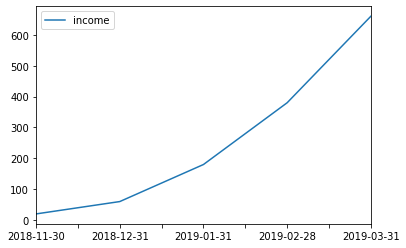

In [57]:
df.plot(kind='line')

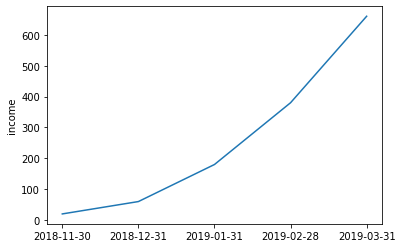

In [58]:
sns.lineplot(x=df.index, y=df.income)

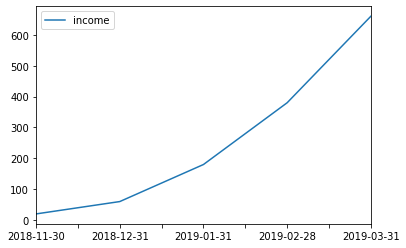

In [59]:
df.plot()

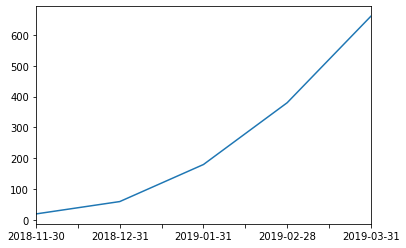

In [60]:
df.income.plot()

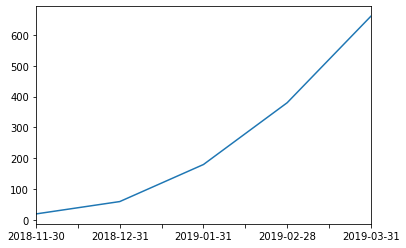

In [61]:
df['income'].plot()

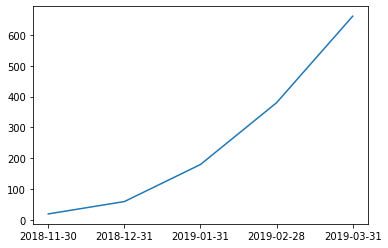

In [62]:
plt.plot(df.index, df.income)

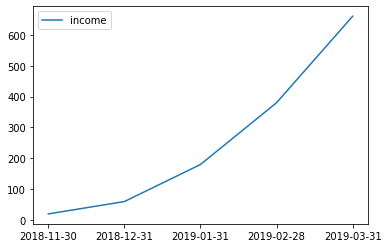

In [63]:
sns.lineplot(data=df)

#### 1.7.2.
`>_`

Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

В ответе вы должны указать число кластеров в виде числа (например: 3).

У вас есть неограниченное число попыток.
Время одной попытки: 5 mins

**Обработайте индивидуальный набор данных за отведённое время**

In [64]:
df = pd.read_csv('data\\dataset_209770_6.txt', sep=' ')
df.head(2)

,x,y
0,814.445594,1497.531139
1,589.881202,804.387887


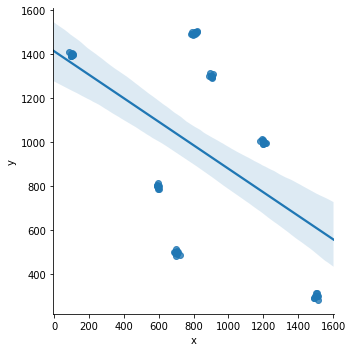

In [65]:
sns.lmplot(x='x', y='y', data=df)

`Количество кластеров = 7`

#### 1.7.3.
`?`

Скачайте [данные](https://stepik.org/media/attachments/course/4852/genome_matrix.csv), представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

Чтобы график отображался как на картинках, добавьте
```
g = # ваш код для создания теплокарты, укажите параметр cmap="viridis" для той же цветовой схемы
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)
```

In [66]:
df = pd.read_csv('data\\genome_matrix.csv', index_col=0)
df.head(2)

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214


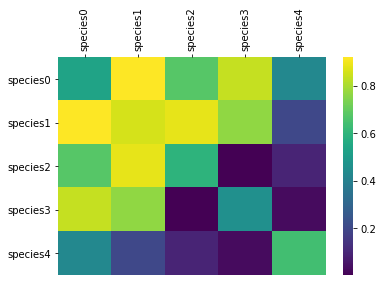

In [67]:
g = sns.heatmap(data=df, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)